In [ ]:
'''
Data Visualization Practice Project
Created by @LucienMens
This project is a refinement of a final exam I had for a programming class.

The program takes in airbnb csv files and processes the hosting info, room info,
the price, and the types of rooms.

I am experimenting with pandas for processing the data and matlab plotting
for displaying the data. Currently, the displays are not interactive, but I
would like to add that in eventually.
'''

In [5]:
import statistics
from decimal import Decimal
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import csv
%matplotlib inline

In [6]:
#filename should be xxx.csv
x = input("Enter a file name: ")
#data needs to be a global var for plots
dataset = pd.read_csv(x)
#this reads the file and puts it into a dataset
def dataCreate(x):
#used for verification to make sure there are enough rows & columns
    y = dataset.shape
    print(y)

Enter a file name: brno.csv


In [7]:
def listingsInfo(x):
    global multi
    multi =  dataset['host_id'].value_counts()
    #this gives you the total number of hostids
    print("Total number of listings is:",len(multi))
    print("Maximum number of listings per hosts:", max(multi))

In [8]:
#Percentage of hosts that have more than one listing
def multiHosts(x):
    v = dataset['host_id'].value_counts()
    atwo = dataset[dataset['host_id'].isin(v.index[v.gt(2)])]
#percentage of hosts
    perhos = int(((round((len(atwo) / len(v)), 2))*100))
    print("The percentage of hosts with more than one listing is",
      perhos,"percent.")

In [9]:
#Total price of all listings in the city/region for one night
def listPrices(x):
    dataset['price'] = pd.to_numeric(dataset['price'])
    print("The total price of all listings in the city for one night are", 
      int(dataset['price'].sum()),"dollars, USD.")

In [10]:
#Median listing price
def medList(x):
    tot = int(statistics.median(dataset['price']))
    print("The median room price is",tot,"dollars, USD.")

In [11]:
#The shares of private rooms, shared rooms, and entire home/apartments
def roomShares(x):
    rooms = dataset['room_type'].value_counts(normalize=True).iloc[:3].round(decimals=2)
    room = rooms[0:3]
    global per
    for x in dataset.iteritems():
        per = room * 100
    print("The percentages of entire rooms are",int(per[0]),
      "percent, private rooms are",int(per[1]),
      "percent, and shared rooms are,",int(per[2]),"percent.")

In [12]:
#func calls
dataCreate(x)
listingsInfo(x)
multiHosts(x)
listPrices(x)
medList(x)
roomShares(x)

(566, 19)
Total number of listings is: 380
Maximum number of listings per hosts: 24
The percentage of hosts with more than one listing is 49 percent.
The total price of all listings in the city for one night are 34898 dollars, USD.
The median room price is 41 dollars, USD.
The percentages of entire rooms are 61 percent, private rooms are 36 percent, and shared rooms are, 3 percent.


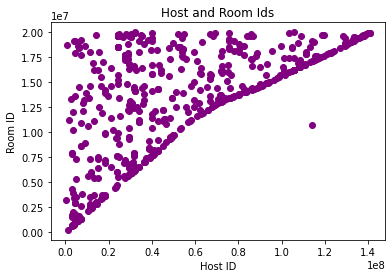

In [13]:
#Data Vis- Visual of the rooms IDs and their hosts
#Eventually would like to enable a zoom feature, also show full numbers
plt.scatter(dataset["host_id"],dataset["room_id"], color = "purple")
plt.title("Host and Room Ids")
plt.xlabel("Host ID")
plt.ylabel("Room ID")
plt.show()

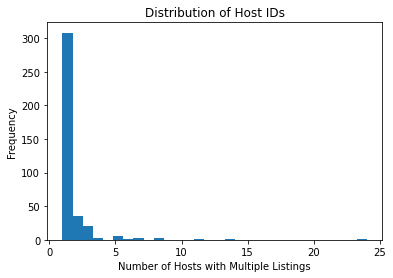

In [14]:
#Data Vis- Histogram of hosts having multiple IDs. Probably would be best shown with a bar graph.
plt.hist(multi, bins = 30)
plt.title("Distribution of Host IDs")
plt.xlabel("Number of Hosts with Multiple Listings")
plt.ylabel("Frequency")
plt.show()

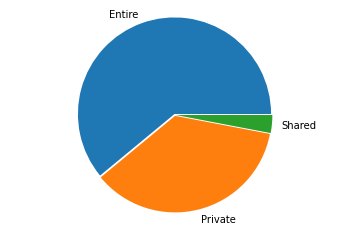

In [15]:
#Data Vis- Pie graph of percentages of types of rooms
labels = ["Entire","Private","Shared"]
sizes = [per[0],per[1],per[2]]
plt.pie(sizes, labels=labels,explode= (0.01,0.01,0.01))
plt.axis('equal')
plt.show()

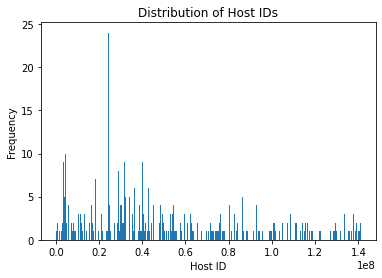

In [16]:
#Data Vis- Gives host IDs with how many rooms they have
plt.hist(dataset["host_id"], bins = 500) #bins can be edited, to show the full number of hosts, which is where the shape comes into play
plt.title("Distribution of Host IDs")
plt.xlabel("Host ID")
plt.ylabel("Frequency")
plt.show()